In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('CSV/spam.csv', encoding='latin1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(columns=[ 'Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.rename(columns = {'v1' :'target','v2':'text'},inplace = True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()

In [9]:
data['target'] = encoded.fit_transform(data['target'])

In [10]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(403)

In [13]:
data = data.drop_duplicates(keep='first')

In [14]:
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to c:\Users\shres\Laptop\ML_Proj
[nltk_data]     ects\Email_Spam_Classifier\venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
nltk.download('punkt', download_dir="./venv/nltk_data")
nltk.download('punkt_tab', download_dir="./venv/nltk_data")
print(nltk.data.find("tokenizers/punkt"))


c:\Users\shres\Laptop\ML_Projects\Email_Spam_Classifier\venv\nltk_data\tokenizers\punkt


[nltk_data] Downloading package punkt to ./venv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./venv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
data['count_letters'] = data['text'].apply(len)

In [17]:
data.head()

,target,text,count_letters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
data['count_words'] = data['text'].apply(lambda x:len(word_tokenize(x)))

In [19]:
data.head()

,target,text,count_letters,count_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
data['count_sentences'] = data['text'].apply(lambda x:len(sent_tokenize(x)))

In [21]:
data.head()

,target,text,count_letters,count_words,count_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count_letters', ylabel='Count'>

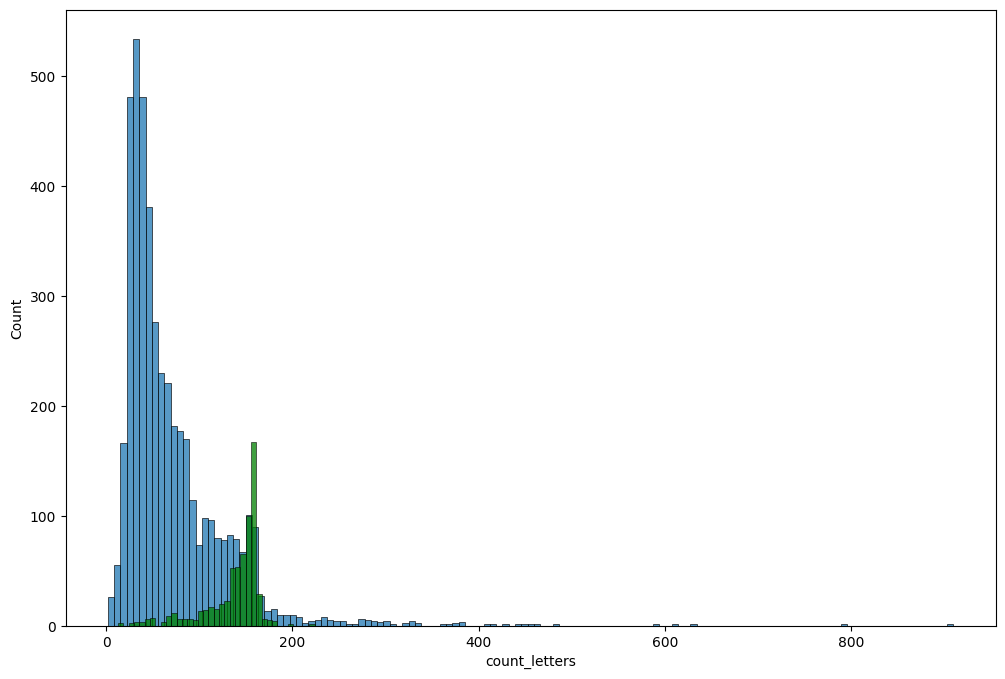

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['count_letters'])
sns.histplot(data[data['target'] == 1]['count_letters'],color = 'green')

<Axes: xlabel='count_words', ylabel='Count'>

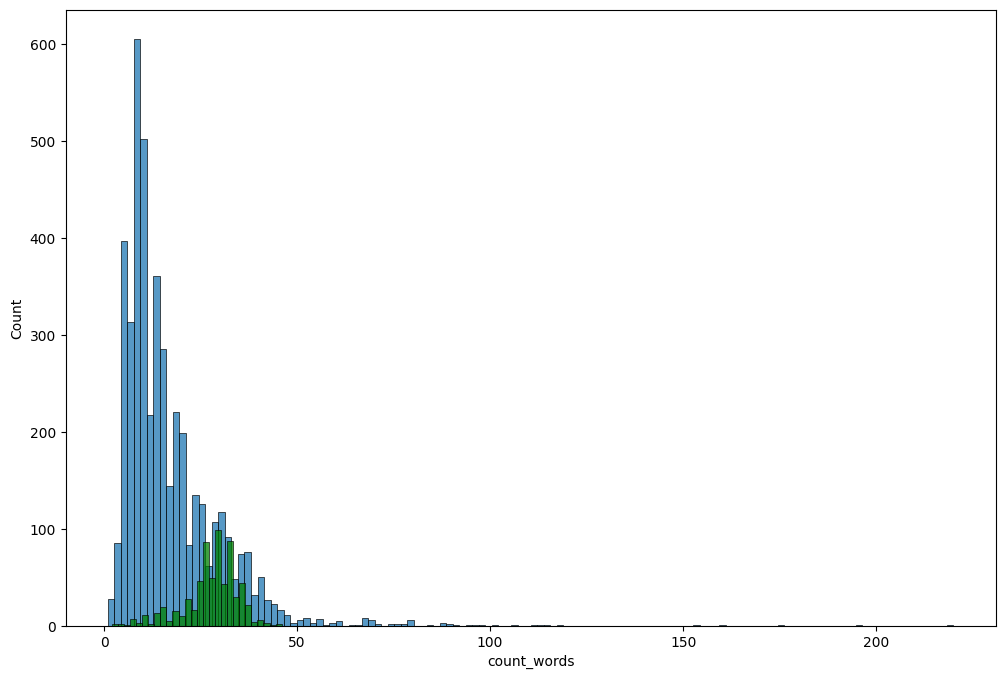

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['count_words'])
sns.histplot(data[data['target'] == 1]['count_words'],color = 'green')

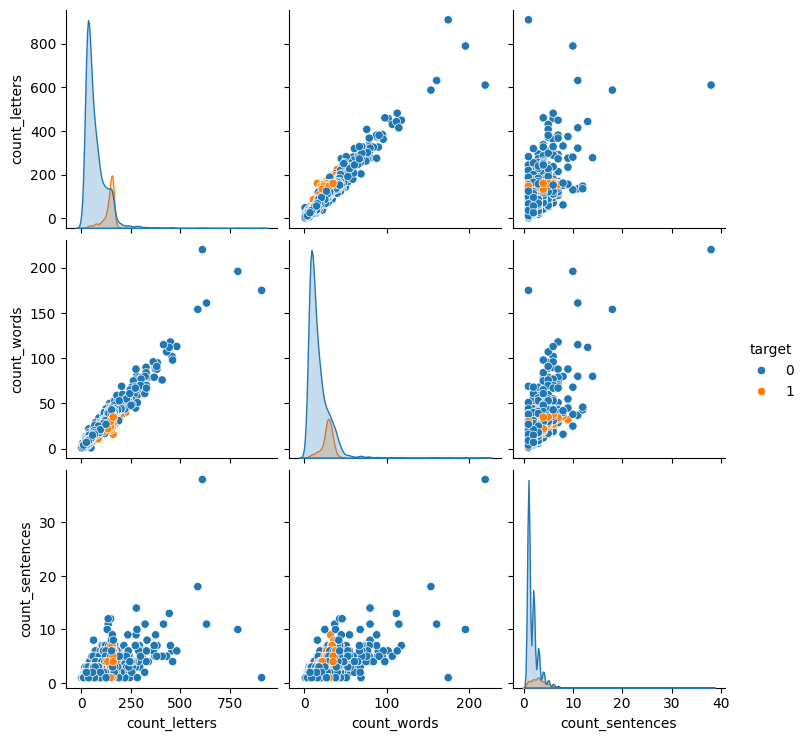

In [25]:
sns.pairplot(data,hue = 'target')

<Axes: >

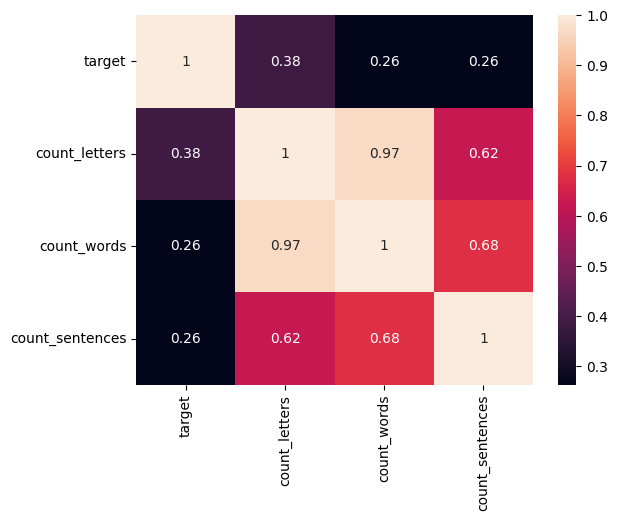

In [26]:
sns.heatmap(data.drop(columns=['text']).corr(), annot=True)

In [27]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to c:\Users\shres\Laptop\ML_
[nltk_data]     Projects\Email_Spam_Classifier\venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())

    main_text = [
        ps.stem(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    ]
    
    return ' '.join(main_text)

In [29]:
data['transformed_text']= data['text'].apply(transform_text)

In [30]:
data.head()

,target,text,count_letters,count_words,count_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud
WC = WordCloud(width = 500, height = 500,min_font_size=2,background_color='black',contour_color ='white')

In [32]:
wc_spam = WC.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = ' '))

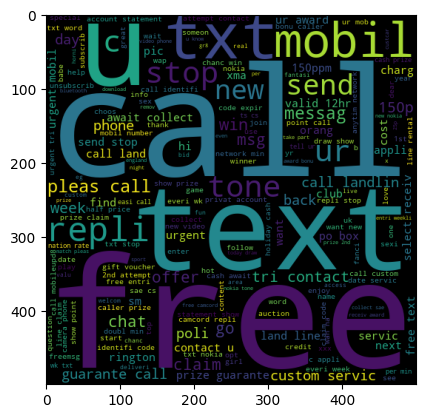

In [33]:
plt.imshow(wc_spam)

In [34]:
wc_ham = WC.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep = ' '))

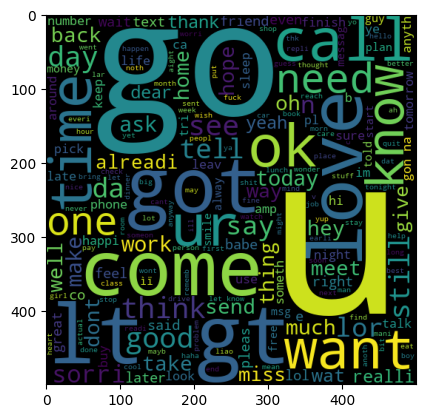

In [35]:
plt.imshow(wc_ham)

In [36]:
spam_text = [
    word
    for text in data.loc[data['target'] == 1, 'transformed_text']
    for word in text.split()
]

In [37]:
from collections import Counter

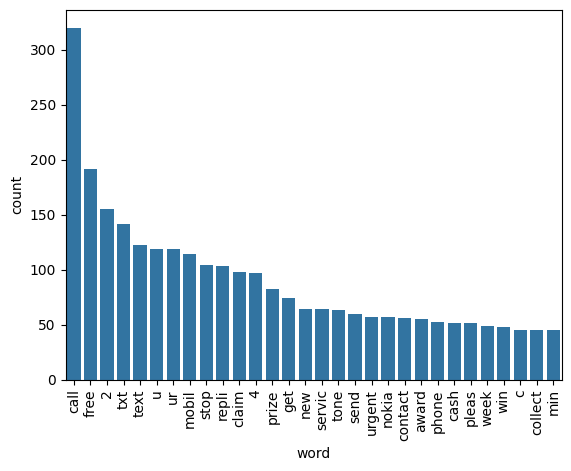

In [38]:
spam_freq_df = pd.DataFrame(Counter(spam_text).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_freq_df)
plt.xticks(rotation=90)
plt.show()

In [39]:
ham_text = [
    word
    for text in data.loc[data['target'] == 0, 'transformed_text']
    for word in text.split()
]

In [40]:
Counter(ham_text)

Counter({'u': 883,
         'go': 404,
         'get': 349,
         'gt': 288,
         'lt': 287,
         '2': 284,
         'come': 275,
         'got': 236,
         'know': 236,
         'like': 234,
         'call': 233,
         'time': 219,
         'ok': 217,
         'love': 216,
         'good': 213,
         'want': 208,
         'ur': 197,
         'day': 190,
         'need': 170,
         'one': 165,
         'lor': 159,
         '4': 156,
         'home': 152,
         'think': 149,
         'see': 147,
         'take': 143,
         'still': 143,
         'da': 142,
         'tell': 133,
         'make': 129,
         'say': 127,
         'back': 127,
         'today': 123,
         'hope': 122,
         'ask': 121,
         'sorri': 121,
         'n': 120,
         'send': 120,
         'r': 120,
         'work': 118,
         'dont': 118,
         'meet': 112,
         'hi': 111,
         'well': 109,
         'thing': 109,
         'wat': 108,
         'k': 107,
  

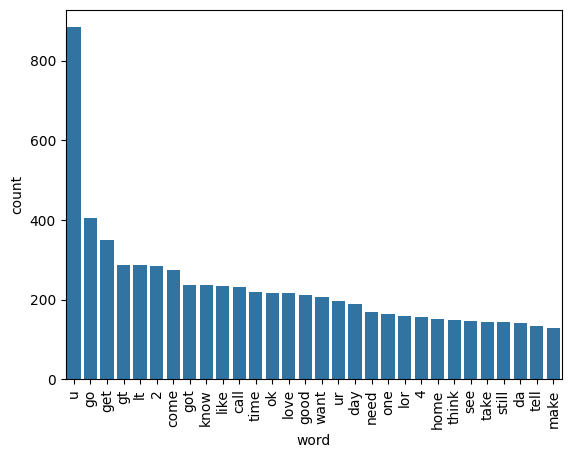

In [41]:
ham_freq_df = pd.DataFrame(Counter(ham_text).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_freq_df)
plt.xticks(rotation=90)
plt.show()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [43]:
X = tfid.fit_transform(data['transformed_text']).toarray()

In [44]:
X.shape

(5169, 3000)

In [45]:
y = data['target'].values

In [46]:
y.shape

(5169,)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred=y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred=y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [53]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred=y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [54]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('svc',svc),('mnb',mnb),('etc',etc)],voting='soft')
model.fit(X_train,y_train)


,estimators,"[('svc', ...), ('mnb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [56]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9796905222437138
0.9834710743801653


In [57]:
estimators=[('svc',svc),('mnb',mnb),('etc',etc)]
final_estimators = RandomForestClassifier(n_estimators=50,random_state=2)

In [58]:
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier(estimators=estimators,final_estimator=final_estimators)
stack_model.fit(X_train,y_train)
y_pred = stack_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9806576402321083
0.946969696969697


,accuracy,precision
GaussianNB,0.873308,0.515982
MultinomialNB,0.970986,1.000000
BernoulliNB,0.983559,0.991870
VotingClassifier,0.979691,0.983471
StackingClassifier,0.980658,0.946970


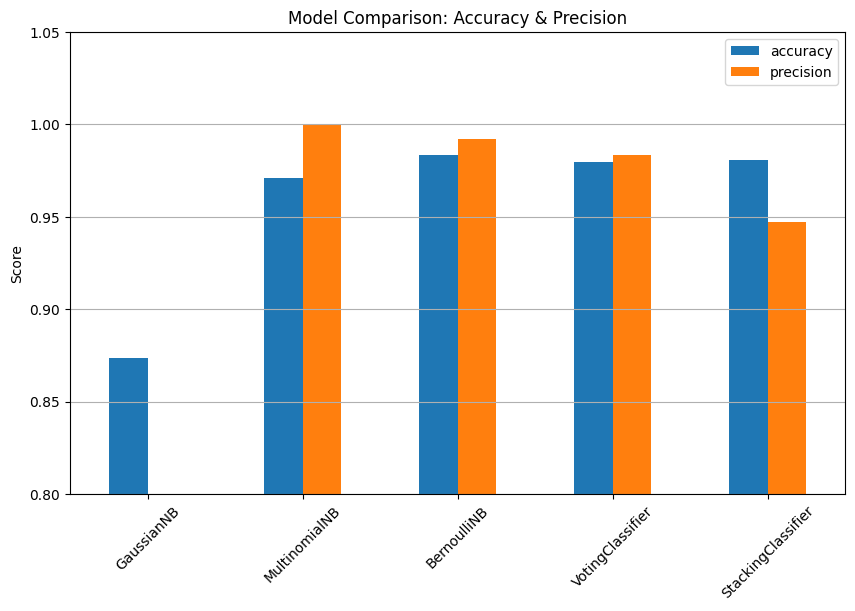

In [59]:
results = {
    'GaussianNB': {
        'accuracy': accuracy_score(y_test, y_pred1),
        'precision': precision_score(y_test, y_pred1)
    },
    'MultinomialNB': {
        'accuracy': accuracy_score(y_test, y_pred2),
        'precision': precision_score(y_test, y_pred2)
    },
    'BernoulliNB': {
        'accuracy': accuracy_score(y_test, y_pred3),
        'precision': precision_score(y_test, y_pred3)
    },
    'VotingClassifier': {
        'accuracy': accuracy_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test))
    },
    'StackingClassifier': {
        'accuracy': accuracy_score(y_test, stack_model.predict(X_test)),
        'precision': precision_score(y_test, stack_model.predict(X_test))
    }
}

results_df = pd.DataFrame(results).T
display(results_df)

results_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison: Accuracy & Precision')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.05)
plt.grid(axis='y')
plt.show()

In [70]:
def predict_spam(text):
    transformed_text = transform_text(text)
    vectorized_text = tfid.transform([transformed_text]).toarray()
    prediction = mnb.predict(vectorized_text)
    if prediction[0] == 1:
        return "Spam"
    return "Not Spam"
    


In [71]:
predict_spam('Hello, how are you?')

'Not Spam'